# Quality Report - FORCE Met Tower dataset

## Correctly loading in the CSV file data columns
Loading into a pandas dataframe first required manually setting each of the datatypes so pandas wouldn't guess the type.


In [67]:
import pandas as pd
import datetime as dt
import netCDF4 as nc
import matplotlib
from datetime import datetime
from erddapy import ERDDAP

types = {'StationID':int, 'time':str, 'longitude':float, 'latitude':float, 'battery_voltage':float,
       'air_temperature':float, 'solar_irradiance':float, 'relative_humidity':float, 'Manual_BP':int,
       'wind_speed':float, 'air_potential_temperature':float, 'wind_speed_15min_max':float, 'Prog_Sig':int,
       'air_pressure':float, 'solar_irradiance_raw':float,
       'wind_speed_2min_max':float, 'air_pressure_raw':float, 'Rain_mm':float,
       'wind_from_direction_15min_average':float, 'air_temperature_1min_max':float,
       'wind_from_direction':float, 'wind_speed_15min_median':float,
       'wind_speed_15min_average':float}

column_names = ['StationID', 'time', 'longitude', 'latitude', 'battery_voltage',
       'air_temperature', 'solar_irradiance', 'relative_humidity', 'Manual_BP',
       'wind_speed', 'air_potential_temperature', 'wind_speed_15min_max',
       'Prog_Sig', 'air_pressure', 'solar_irradiance_raw',
       'wind_speed_2min_max', 'air_pressure_raw', 'Rain_mm',
       'wind_from_direction_15min_average', 'air_temperature_1min_max',
       'wind_from_direction', 'wind_speed_15min_median',
       'wind_speed_15min_average', 'Elevation_Correction', 'elevation']

### Loading dataset from ERDDAP into pandas

#### Note on pattern datatypes:
```int, string, float, float, float, float, float, float, int, float, float, float, int, float, float, float, float, int, float, float, float, float, float, float, float```

In [87]:
e = ERDDAP(server="https://cioosatlantic.ca/erddap",)
e.protocol = "tabledap"
e.dataset_id = "force_meteorological_tower"
e.response = "csv"

url = e.get_download_url()
df_csv = pd.read_csv(url, dtype=types, header=0, skiprows=2, names=column_names)

### Confirming data types are correct.

In [69]:
df_csv.dtypes

StationID                              int32
time                                  object
longitude                            float64
latitude                             float64
battery_voltage                      float64
air_temperature                      float64
solar_irradiance                     float64
relative_humidity                    float64
Manual_BP                              int32
wind_speed                           float64
air_potential_temperature            float64
wind_speed_15min_max                 float64
Prog_Sig                               int32
air_pressure                         float64
solar_irradiance_raw                 float64
wind_speed_2min_max                  float64
air_pressure_raw                     float64
Rain_mm                              float64
wind_from_direction_15min_average    float64
air_temperature_1min_max             float64
wind_from_direction                  float64
wind_speed_15min_median              float64
wind_speed

### Inspecting the top few rows of data
Looking at the beginning of the data we can see they are updating roughly every 15 minutes. This is important info as we describe the values later in the notebook.

In [70]:
print(df_csv.head())

   StationID                  time  longitude  latitude  battery_voltage  \
0       1156  2016-12-09T14:19:23Z    -64.403   45.3713         13.24182   
1       1156  2016-12-09T14:34:23Z    -64.403   45.3713         13.24734   
2       1156  2016-12-09T14:49:23Z    -64.403   45.3713         13.23076   
3       1156  2016-12-09T15:04:23Z    -64.403   45.3713         13.21419   
4       1156  2016-12-09T15:19:23Z    -64.403   45.3713         13.21419   

   air_temperature  solar_irradiance  relative_humidity  Manual_BP  \
0        -0.990490          0.104737           74.01630          0   
1        -1.024410          0.271738           70.96338          0   
2        -0.854805          0.195477           68.82634          0   
3        -0.617355          0.218138           69.40301          0   
4        -0.922649          0.142361           70.01358          0   

   wind_speed  ...  wind_speed_2min_max  air_pressure_raw  Rain_mm  \
0      3.8416  ...                4.900         1000

### Inspecting the statistics of each column
This includes a raw count of how many rows of data are present, and the typical min/max/median/mean shape of the data.

In [71]:
df_csv.describe()

,StationID,longitude,latitude,battery_voltage,air_temperature,solar_irradiance,relative_humidity,Manual_BP,wind_speed,air_potential_temperature,...,wind_speed_2min_max,air_pressure_raw,Rain_mm,wind_from_direction_15min_average,air_temperature_1min_max,wind_from_direction,wind_speed_15min_median,wind_speed_15min_average,Elevation_Correction,elevation
count,190111.0,1.901110e+05,1.901110e+05,190111.000000,190111.000000,190111.000000,190111.000000,190111.0,190111.000000,190111.000000,...,190111.000000,190111.000000,190111.0,152095.000000,190111.000000,190111.000000,152095.000000,152047.000000,1.901110e+05,190111.0
mean,1156.0,-6.440300e+01,4.537130e+01,13.178806,7.056137,0.153830,78.373985,0.0,3.387715,9.936129,...,4.468832,1012.297645,0.0,170.024194,7.144291,173.998157,3.197759,3.217640,1.800780e+00,25.0
std,0.0,2.337834e-10,3.852573e-11,0.292436,8.874873,0.256318,15.297005,0.0,3.150281,9.752172,...,3.676487,9.597065,0.0,105.823330,8.879875,105.923954,3.023322,3.001395,5.073066e-12,0.0
min,1156.0,-6.440300e+01,4.537130e+01,11.698810,-21.369210,-0.000484,17.123540,0.0,0.000000,-22.095700,...,0.000000,957.919400,0.0,0.003483,-21.370000,-0.048266,0.000000,0.000000,1.800780e+00,25.0
25%,1156.0,-6.440300e+01,4.537130e+01,12.932780,0.474585,0.000000,68.022965,0.0,1.097600,2.758320,...,1.803000,1006.816000,0.0,85.095955,0.564000,85.517505,0.960400,0.998902,1.800780e+00,25.0
50%,1156.0,-6.440300e+01,4.537130e+01,13.152780,7.408242,0.004346,81.004060,0.0,2.646000,10.042150,...,3.724000,1012.850000,0.0,140.738910,7.508000,148.795100,2.528400,2.556698,1.800780e+00,25.0
75%,1156.0,-6.440300e+01,4.537130e+01,13.360910,14.536210,0.202657,91.454710,0.0,4.723600,17.488640,...,6.233000,1018.743000,0.0,280.542503,14.620000,281.155000,4.449200,4.465950,1.800780e+00,25.0
max,1156.0,-6.440300e+01,4.537130e+01,14.307720,30.013530,1.444560,100.273700,0.0,28.616000,36.238160,...,29.420000,1041.435000,0.0,359.995133,30.190000,354.620900,24.970400,24.834256,1.800780e+00,25.0


### Assess the data for missing values
Check the presence of air temperature (degree Celsius) on the y-axis, over time from 2016 to 2022 with 15 minute datapoints.

<AxesSubplot:xlabel='time'>

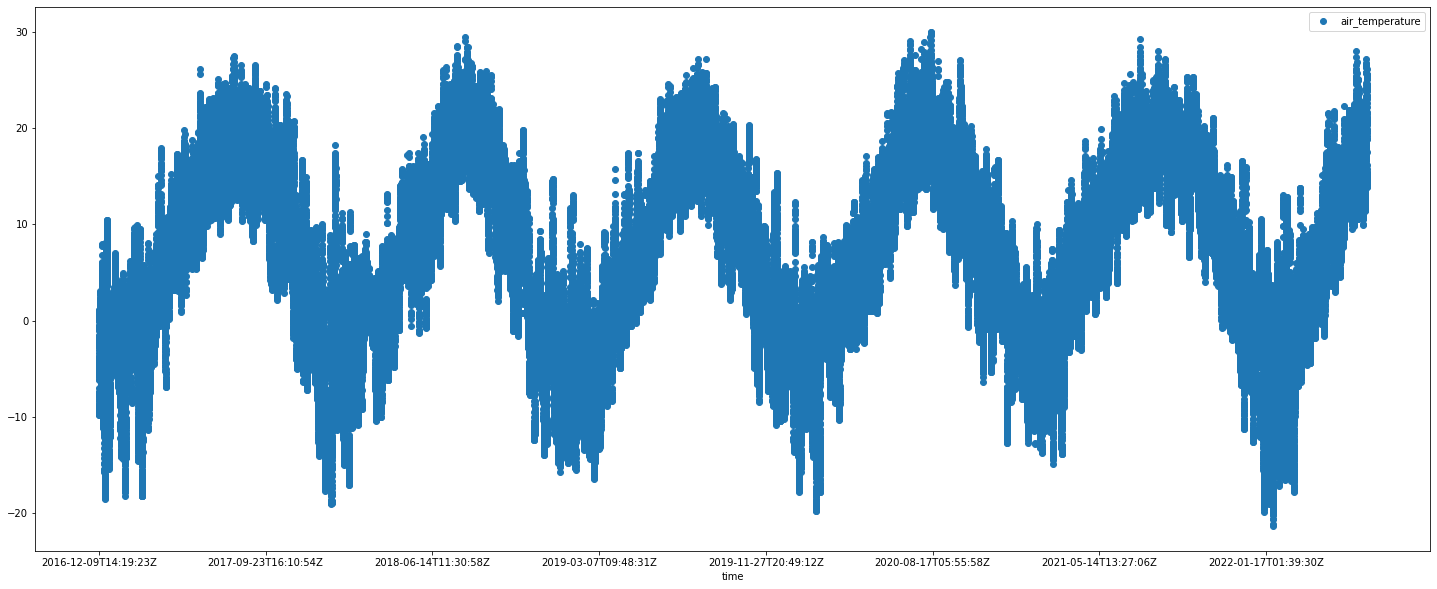

In [72]:
df_csv.plot(x='time', y='air_temperature', linestyle='', marker='o', figsize=(25,10))

### Assess the data for missing values
Check the presence of wind speed (m/s) on the y-axis, over time from 2016 to 2022 with 15 minute datapoints.
Note: the missing roughly 6-month period when the wind speed anemometer was down.

<AxesSubplot:title={'center':'Wind Speed'}, xlabel='time', ylabel='m/s'>

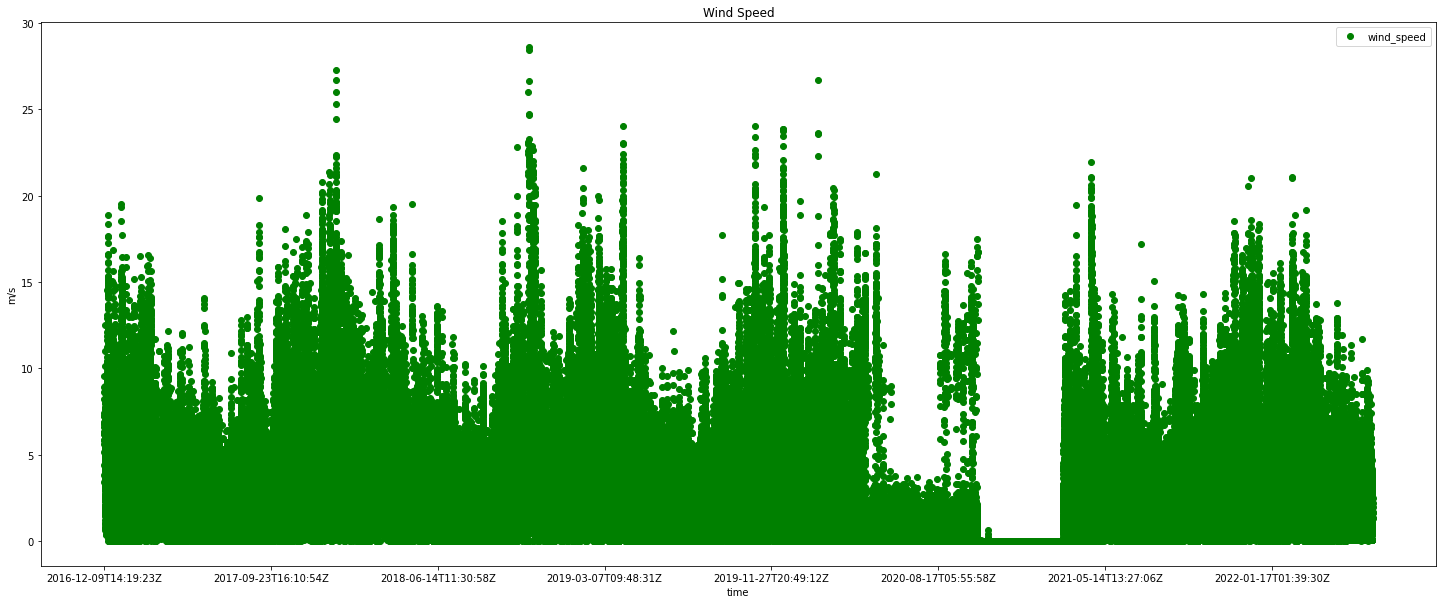

In [73]:
df_csv.plot(x='time', y='wind_speed', ylabel='m/s', title='Wind Speed', linestyle='', color='green', marker='o', figsize=(25,10))

Highlighting the presence of wind speed (m/s) on the y-axis, over time from 2020 August to 2021 April with 15 minute datapoints.

<AxesSubplot:title={'center':'Wind Speed 2021 missing data months but JSON files are still present'}, xlabel='time', ylabel='m/s'>

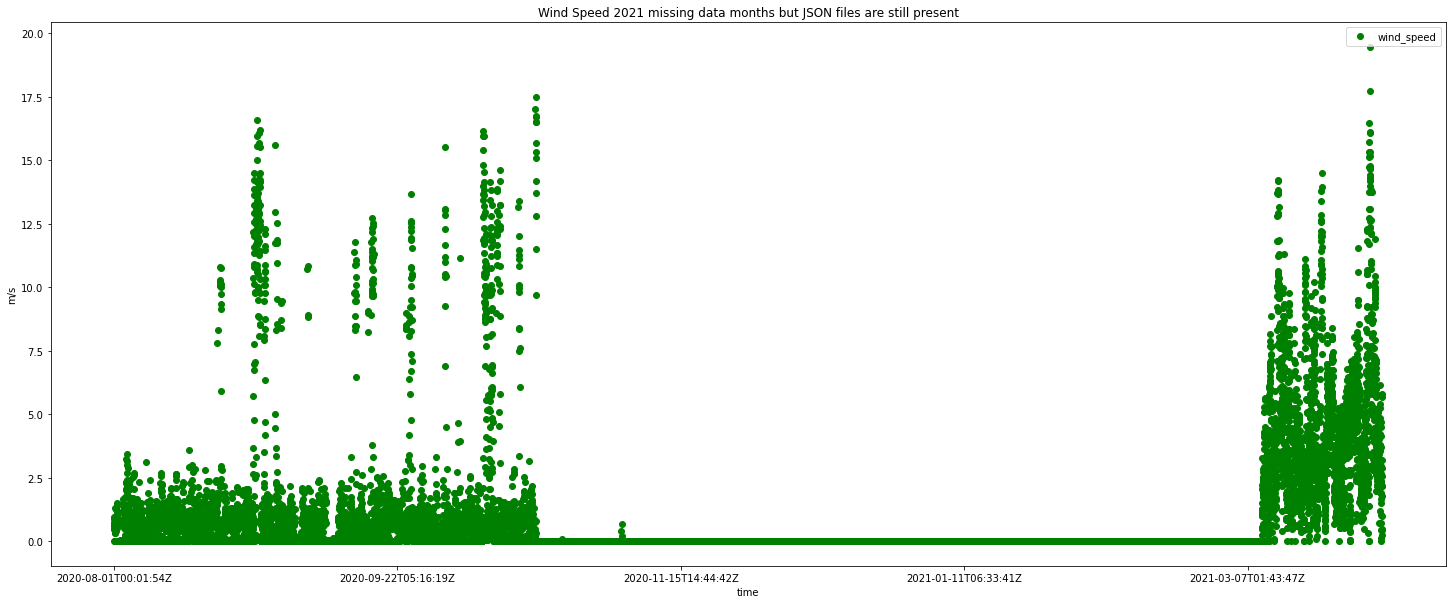

In [74]:
df_csv[(df_csv['time']>="2020-08") & (df_csv['time']<="2021-04")].plot(x='time', y='wind_speed', ylabel='m/s', title='Wind Speed 2021 missing data months but JSON files are still present', linestyle='', color='green', marker='o', figsize=(25,10))

Note that there isn't an obvious visual gap here at first glance, and that is because there were no JSON files, meaning the datapoints are completely missing along with their timestamps. If the data had been empty and still had a JSON it would display here in Jupyter notebooks as a missing chunk.

<AxesSubplot:title={'center':'Air Temperature April 2022 Missing JSON files'}, xlabel='time', ylabel='degree Celsius'>

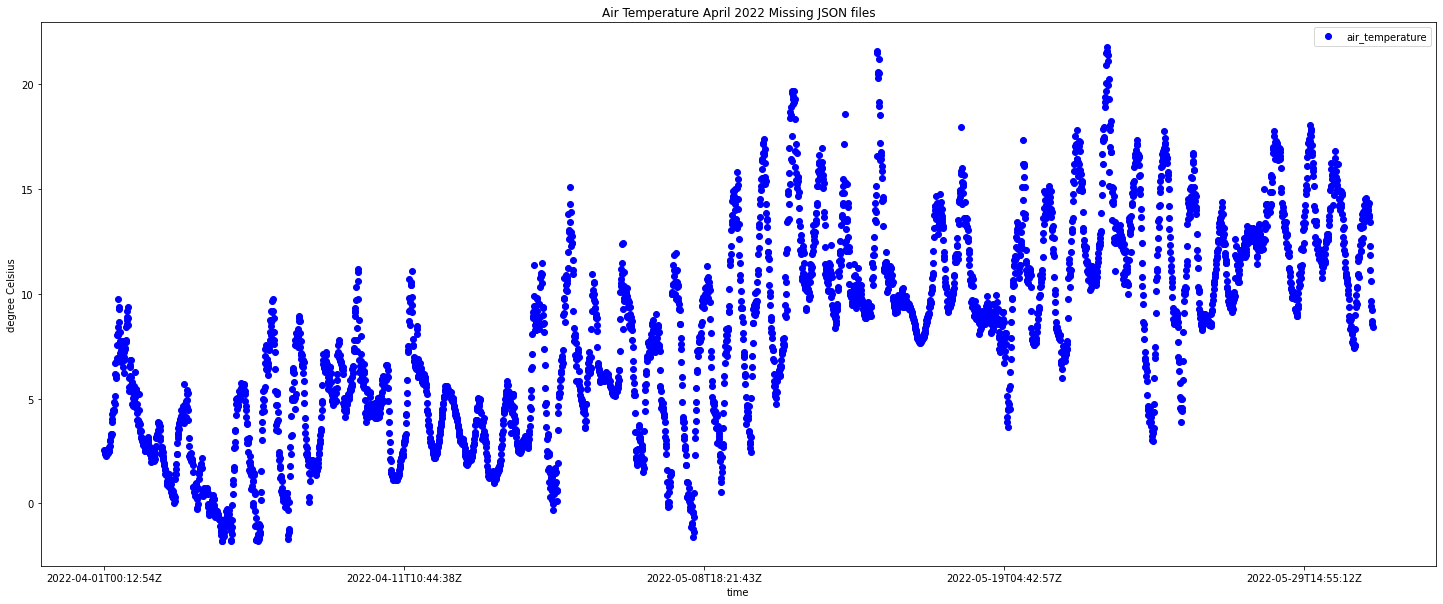

In [75]:
df_csv[(df_csv['time']>="2022-04") & (df_csv['time']<="2022-06")].plot(x='time', y='air_temperature', ylabel='degree Celsius', title='Air Temperature April 2022 Missing JSON files', linestyle='', color='blue', marker='o', figsize=(25,10))

Check the presence of solar irradiance (MJ) on the y-axis, over time from 2016 to 2022 with 15 minute datapoints.

<AxesSubplot:title={'center':'solar irradiance'}, xlabel='time', ylabel='MJ/m^2'>

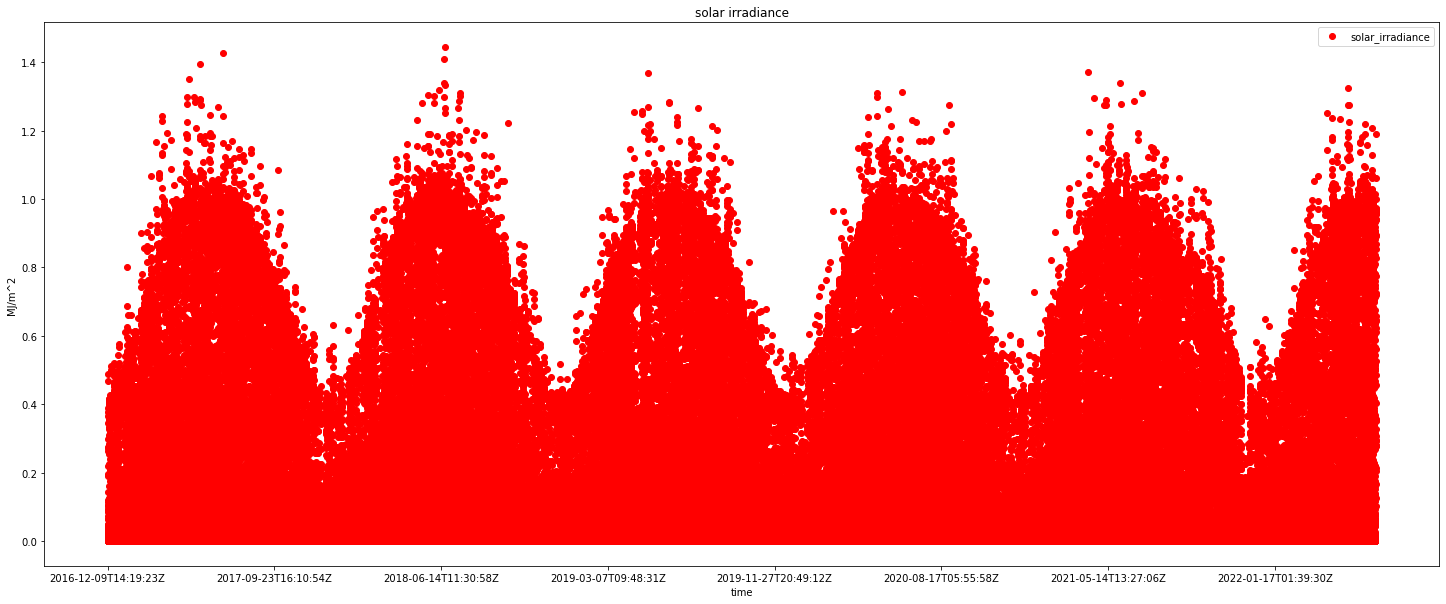

In [76]:
df_csv.plot(x='time', y='solar_irradiance', ylabel='MJ/m^2', title='solar irradiance', linestyle='', color='red', marker='o', figsize=(25,10))

# Missing data JSONs in April ERDDAP plot
![FORCE missing data](./force_meteorological_tower_missingJSONs.png)

In [77]:
df = df_csv['time']
df_time = pd.to_datetime(df)

def date_time_str(time):
    # Needed for rounding day to beginning of month to avoid duplicate appending by mistake
    #if type(time) is str:
    # time is str
    return datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S%z').strftime('%Y-%m-%d')

df_time = df_time.map(lambda x: date_time_str(x))

print(df_time)

0         2016-12-09
1         2016-12-09
2         2016-12-09
3         2016-12-09
4         2016-12-09
             ...    
190106    2022-07-14
190107    2022-07-14
190108    2022-07-14
190109    2022-07-14
190110    2022-07-14
Name: time, Length: 190111, dtype: object


In [78]:
print(pd.date_range(start="2016-12-09", end="2022-06-28").difference(df_time))

DatetimeIndex(['2016-12-11', '2016-12-14', '2016-12-15', '2016-12-16',
               '2016-12-17', '2016-12-18', '2016-12-19', '2016-12-20',
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30', '2016-12-31', '2017-12-05',
               '2019-09-08', '2019-09-09', '2019-09-10', '2019-09-11',
               '2020-11-08', '2020-11-25', '2022-04-12', '2022-04-14',
               '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18',
               '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22',
               '2022-04-23', '2022-04-24', '2022-04-27'],
              dtype='datetime64[ns]', freq=None)


In [79]:
print(len(pd.date_range(start="2016-12-09", end="2022-06-28").difference(df_time)))

39


In [80]:
#df_solar = df_csv[['time','solar_irradiance']]
df_solar = df_csv.loc[:,('time','solar_irradiance')]
df_solar['time'] = df_solar['time'].astype('datetime64')
#df_solar.index = df_solar.time
print(df_solar)
# print(df_solar.dtypes)

                      time  solar_irradiance
0      2016-12-09 14:19:23          0.104737
1      2016-12-09 14:34:23          0.271738
2      2016-12-09 14:49:23          0.195477
3      2016-12-09 15:04:23          0.218138
4      2016-12-09 15:19:23          0.142361
...                    ...               ...
190106 2022-07-14 19:21:37          0.351450
190107 2022-07-14 19:36:38          0.204169
190108 2022-07-14 19:51:40          0.328407
190109 2022-07-14 20:06:40          0.525837
190110 2022-07-14 20:21:37          0.291810

[190111 rows x 2 columns]


In [81]:
solar = pd.DatetimeIndex(df_solar.time).to_series().resample('M')
# print(solar)

In [82]:
df_solar.groupby([(df_solar.time.dt.year), (df_solar.time.dt.month)])['solar_irradiance'].sum()

time  time
2016  12        5.938558
2017  1       158.332767
      2       264.499679
      3       398.755576
      4       533.156192
                 ...    
2022  3       372.271271
      4       203.995435
      5       745.233072
      6       702.746109
      7       345.092665
Name: solar_irradiance, Length: 68, dtype: float64

In [83]:
solar_day = df_solar.groupby([(df_solar.time.dt.year), (df_solar.time.dt.month), (df_solar.time.dt.day)])['solar_irradiance'].sum()
print(solar_day)

time  time  time
2016  12    9        5.005268
            10       0.474533
            12       0.458757
            13       0.000000
2017  1     1        0.041481
                      ...    
2022  7     10      27.635841
            11      32.245359
            12      29.977831
            13      24.743450
            14      27.101996
Name: solar_irradiance, Length: 2005, dtype: float64


In [84]:
solar_day.to_csv("./output/example_solar_day.csv")

In [85]:
solar_day.describe()

count    2005.000000
mean       14.585937
std        10.274533
min        -0.000965
25%         5.785377
50%        12.384492
75%        23.021479
max        49.782026
Name: solar_irradiance, dtype: float64

<AxesSubplot:ylabel='Frequency'>

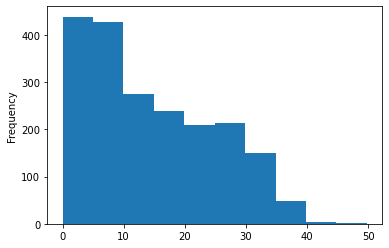

In [86]:
solar_day.plot.hist(bins=10)